In [59]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Model

In [75]:
# Instantiating a generator object and normalizing the RGB values
traingen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = traingen.flow_from_directory(
    directory='data',
    target_size=(500, 500),
    class_mode='binary',
    batch_size=1,
    seed=42
)

Found 5719 images belonging to 2 classes.


In [76]:
# Putting image classification into a dataframe
classes = pd.DataFrame(train_data.classes)
values = classes.value_counts()

In [77]:
classes

,0
0,0
1,0
2,0
3,0
4,0
...,...
5714,1
5715,1
5716,1
5717,1


In [78]:
# Giving the data binary labels to allow for visialization of class imbalance below.
class_dict = {0:'Normal', 1:'PNA'}
classes[0] = classes[0].map(class_dict)

In [79]:
image_interpretation = classes[0].value_counts()
image_interpretation

PNA       4136
Normal    1583
Name: 0, dtype: int64

In [80]:
image_interpretation.index

Index(['PNA', 'Normal'], dtype='object')

IndexError: index 1 is out of bounds for axis 0 with size 1

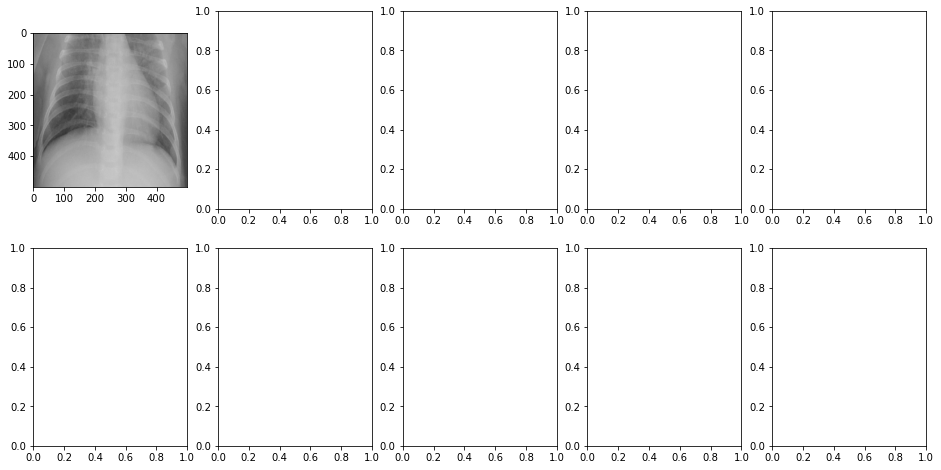

In [81]:
# Visualize
train_batch = train_data.next()
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
    
for i in range(3):
    # Load image into numpy array and re-scale
    img = np.array(train_batch[0][i] * 255, dtype='uint8')
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
fig.suptitle('Training Images')
plt.tight_layout()
plt.show()